In [1]:
# Importing the required libraries
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Model Loading
model = tf.keras.models.load_model('saved_model')

2022-02-28 22:00:49.176120: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69337088 exceeds 10% of free system memory.
2022-02-28 22:00:49.176181: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69337088 exceeds 10% of free system memory.


In [4]:
# Function to predict the image
def predict(filepath):
    LABELS = ['fire', 'no_fire']

    img_side = 200
    img_array = cv2.imread(filepath)
    resize_array = cv2.resize(img_array,(img_side,img_side))
    reshape_array = resize_array.reshape(-1,img_side,img_side,3)
    
    prediction_val = model.predict([reshape_array])
    prediction = LABELS[int(prediction_val[0][0])]    
    
    return [img_array, prediction]

In [7]:
# Storing Image Predictions

images_and_predictions = []

test_dir = 'dataset/testing'
test_image_list = os.listdir(test_dir)

for img_name in test_image_list:
    image_path = os.path.join(test_dir,img_name)
    images_and_predictions.append(predict(image_path))

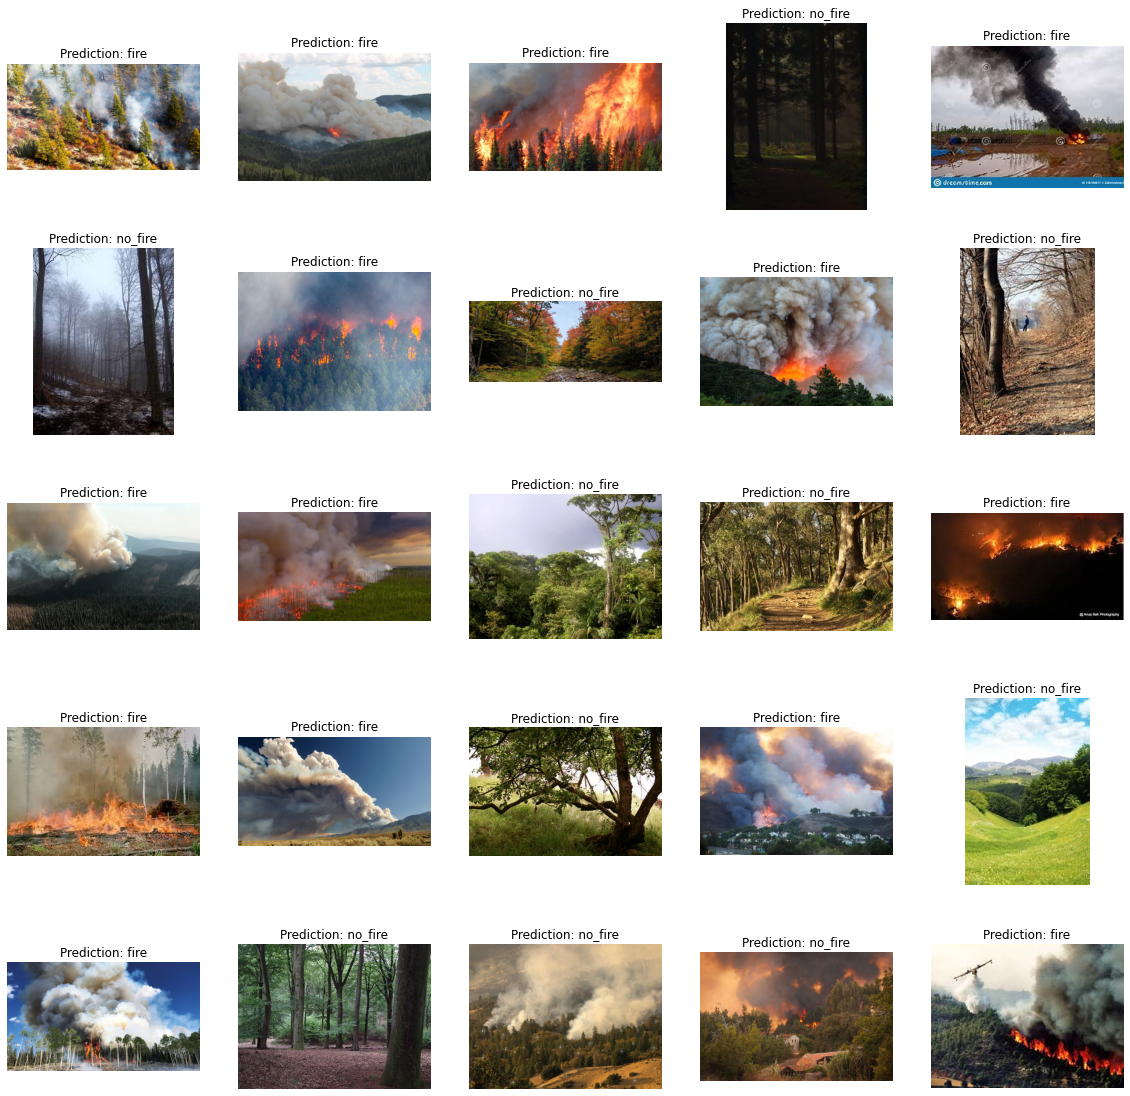

In [8]:
# Displaying the images along with predictions
fig = plt.figure(figsize=(20, 20))
num_images = len(images_and_predictions)
columns = 5
rows = num_images//columns

for i in range(1, rows*columns +1):
    
    [image,label] = images_and_predictions[i-1]
    fig.add_subplot(rows, columns, i)
    # turning the axis of the subplots off
    plt.axis("off")
    # label for each image is the prediction
    plt.title("Prediction: "+label)
    # converting the image format from BGR TO RGB since openCV stores images in BGR format
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()